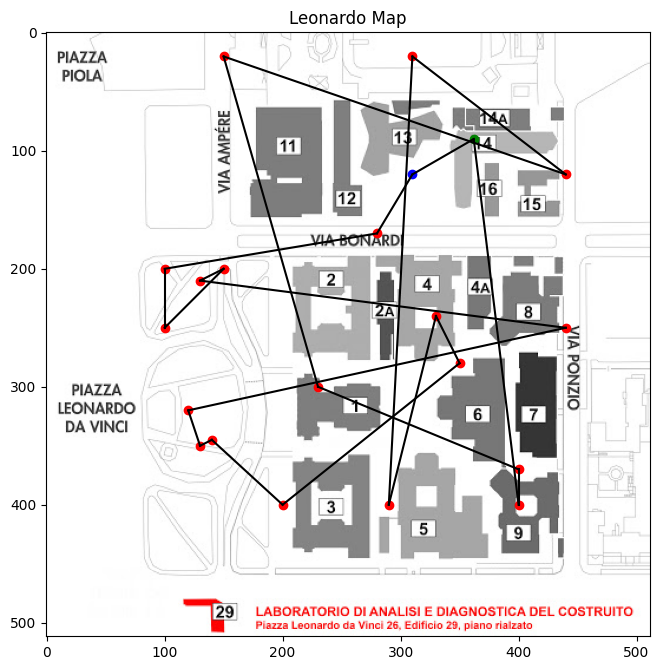

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

img=plt.imread("poli2.jpg")
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.title("Leonardo Map") 

positions = [[362,90],[310,120],[280,170],[100,200],[100,250],[150,200],[130,210],[440,250],[120,320],[130,350],[140,345],[200,400],[350,280],[330,240],[290,400],[310,20],
            [440,120],[150,20],[230,300],[400,370],[400,400],[362,90]]


# visualizza il percorso del drone che può muoversi ovunque
def trajectory(pos):
    x = [item[0] for item in pos]
    y = [item[1] for item in pos]
    plt.plot(x[2:-1], y[2:-1], 'ro') 
    plt.plot(x[1],y[1],'bo')
    plt.plot(x[0],y[0],'go')
    for i in range(1,len(pos)):
        x1,x2 = pos[i][0], pos[i-1][0]
        y1,y2 = pos[i][1], pos[i-1][1]
        plt.plot([x1,x2],[y1,y2],'k-')

# visualizza il percorso del drone che può muoversi solo in linea retta
def trajectory_MAE(pos):
    x = [item[0] for item in pos]
    y = [item[1] for item in pos]
    plt.plot(x[2:-1], y[2:-1], 'ro') 
    plt.plot(x[1],y[1],'bo')
    plt.plot(x[0],y[0],'go')
    for i in range(1,len(pos)):
        x1,x2 = pos[i][0], pos[i-1][0]
        y1,y2 = pos[i][1], pos[i-1][1]
        plt.plot([x1,x1],[y1,y2],'k-')
        plt.plot([x1,x2],[y2,y2],'k-')

trajectory(positions)
plt.imshow(img)
# visualizza l'immagine

In [2]:
def MSE(pos):
    sum = 0
    for i in range(1,len(pos)):
        sum += (pos[i][0]-pos[i-1][0])**2 + (pos[i][1]-pos[i-1][1])**2
    return(sum/len(pos))

def MAE(pos):
    sum = 0
    for i in range(1,len(pos)):
        sum += abs(pos[i][0]-pos[i-1][0]) + abs(pos[i][1]-pos[i-1][1])
    return(sum/len(pos))

In [3]:
def performance(pos,metrics = MSE):
    loss = metrics(pos)
    return(loss)
    
print(f"MSE = {performance(positions,MSE)}")
print(f"MAE = {performance(positions, MAE)}")

MSE = 36818.09090909091
MAE = 181.36363636363637


In [4]:
import random

class Random_Optimizer:
    def __init__(self, positions):
        self.positions = positions
        self.schedule = [positions[0]]

    def scheduler(self):
        for i in range(1,len(positions)-1):
            pos_find = True
            while pos_find:
                new_pos = random.choice(positions)
                if not new_pos in self.schedule:
                    self.schedule.append(new_pos)
                    pos_find = False
        self.schedule.append(positions[0])
        return(self.schedule)
        

    def plot(self):
        img=plt.imread("poli2.jpg")
        fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
        plt.title("Leonardo Map") 
        x = [item[0] for item in self.schedule]
        y = [item[1] for item in self.schedule]
        plt.plot(x[2:-1], y[2:-1], 'ro') 
        plt.plot(x[1],y[1],'bo')
        plt.plot(x[0],y[0],'go')
        for i in range(1,len(self.schedule)):
            x1,x2 = self.schedule[i][0], self.schedule[i-1][0]
            y1,y2 = self.schedule[i][1], self.schedule[i-1][1]
            plt.plot([x1,x2],[y1,y2],'k-')

    def plot_MAE(self):
        img=plt.imread("poli2.jpg")
        fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
        plt.title("Leonardo Map")      
        x = [item[0] for item in self.schedule]
        y = [item[1] for item in self.schedule]
        plt.plot(x[2:-1], y[2:-1], 'ro') 
        plt.plot(x[1],y[1],'bo')
        plt.plot(x[0],y[0],'go')
        for i in range(1,len(self.schedule)):
            x1,x2 = self.schedule[i][0], self.schedule[i-1][0]
            y1,y2 = self.schedule[i][1], self.schedule[i-1][1]
            plt.plot([x1,x1],[y1,y2],'k-')
            plt.plot([x1,x2],[y2,y2],'k-')
            

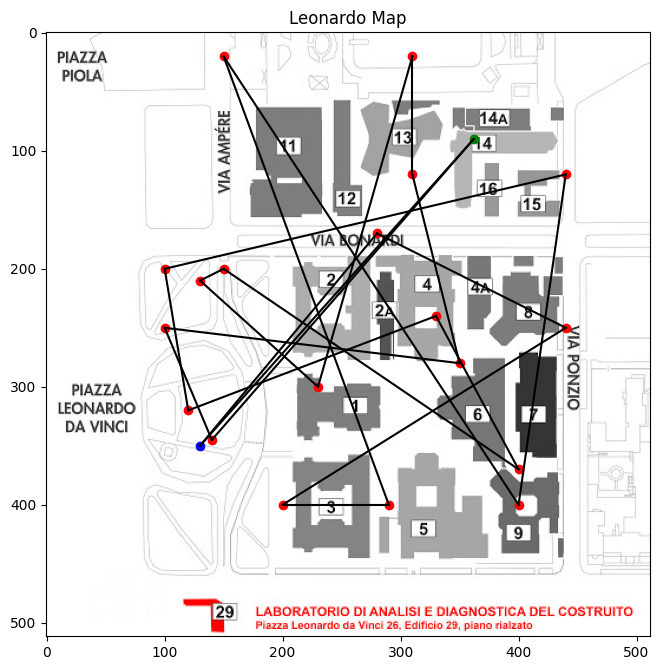

In [5]:
positions2 = Random_Optimizer(positions)
Random_Optimizer.scheduler(positions2)
Random_Optimizer.plot(positions2)
plt.imshow(img)

In [6]:
class Greedy_Optimizer(Random_Optimizer):
    def __init__(self, positions, loss):
        super().__init__(positions) # non toccare, uso il constructor della classe padre
        self.loss = loss

    def scheduler(self):
        for j in range(1,len(positions)-1):
            self.schedule.append([0,0])
            min = 100000
            for i in range(0,len(positions)):
                d = self.loss([self.schedule[j-1],positions[i]])
                if (d != 0) and (d < min) and (not positions[i] in self.schedule):
                    min = d
                    self.schedule[j] = positions[i]
        self.schedule.append(positions[0])
        return(self.schedule)

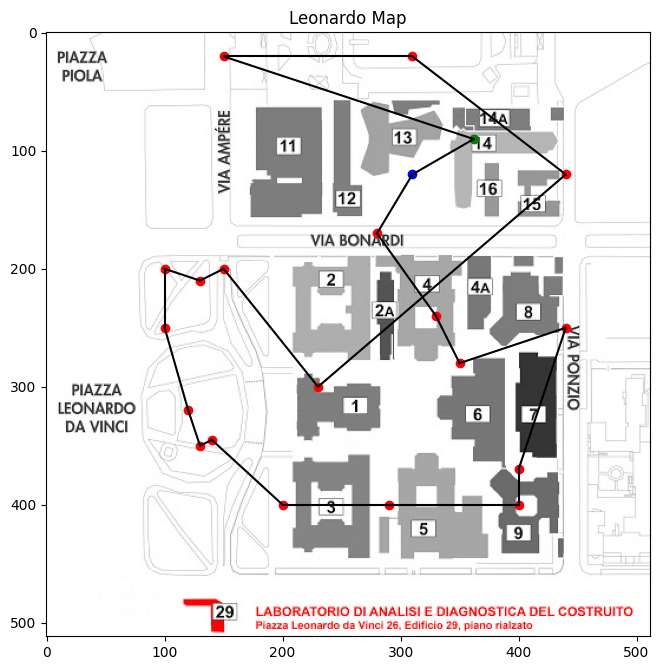

In [7]:
positions3 = Greedy_Optimizer(positions,MSE)
Greedy_Optimizer.scheduler(positions3)
Random_Optimizer.plot(positions3)
plt.imshow(img)

In [8]:
#la soluzione del Greedy_Optimizer presenta una intersezione, quindi non rappresenta l'ottimo 

In [9]:
random.seed(0)

metrics = MSE

D1 = Random_Optimizer(positions)
D2 = Greedy_Optimizer(positions, metrics)


print(f"Performance of Random_Opt = {performance(D1.scheduler(), metrics)}")
print(f"Performance of Initial schedule = {performance(positions, metrics)}")
print(f"Performance of Greedy_Opt = {performance(D2.scheduler(), metrics)}")

Performance of Random_Opt = 52092.63636363636
Performance of Initial schedule = 36818.09090909091
Performance of Greedy_Opt = 12490.818181818182
